NSL-KDD para el TFM.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load the NSL-KDD dataset from Google Drive
train_path = '/content/drive/My Drive/datasets/KDDTrain+.txt'
test_path = '/content/drive/My Drive/datasets/KDDTest+.txt'

In [9]:
# Specify column names for NSL-KDD dataset (you can find these in the dataset documentation)
columns = [...]  # Specify the full list of columns from NSL-KDD documentation
train_data = pd.read_csv(train_path, names=columns)
test_data = pd.read_csv(test_path, names=columns)

In [8]:
train_data.head()

Ellipsis
0 tcp ftp_data SF 491 0    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2   2  0.0 0.0 0.0 0.0 1.00 0.00 0.00 150 25  0.17 0.03 0.17 0.00 0.00 0.00 0.05 0.00 normal         20
  udp other    SF 146 0    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 13  1  0.0 0.0 0.0 0.0 0.08 0.15 0.00 255 1   0.00 0.60 0.88 0.00 0.00 0.00 0.00 0.00 normal         15
  tcp private  S0 0   0    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 123 6  1.0 1.0 0.0 0.0 0.05 0.07 0.00 255 26  0.10 0.05 0.00 0.00 1.00 1.00 0.00 0.00 neptune        19
      http     SF 232 8153 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 5   5  0.2 0.2 0.0 0.0 1.00 0.00 0.00 30  255 1.00 0.00 0.03 0.04 0.03 0.01 0.00 0.01 normal         21
                  199 420  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 30  32 0.0 0.0 0.0 0.0 1.00 0.00 0.09 255 255 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 normal         21

NSL-KDD Dataset Columns and Descriptions.



In [11]:
df_0 = pd.read_csv("/content/drive/My Drive/datasets/KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [12]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [13]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [17]:
# Display column names to identify the correct label column
print(df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


In [20]:
# Assuming the test data file is also in Google Drive
test_path = '/content/drive/My Drive/datasets/KDDTest+.txt'

# Load the test dataset
df_test = pd.read_csv(test_path, header=None)
df_test.columns = df.columns  # Set columns to match training data if not already named

# Preprocess the test data
X_test = df_test[features]
y_test = df_test["attack"].apply(lambda x: 1 if x != "normal" else 0)




In [22]:
# Define categorical features explicitly
categorical_features = ["protocol_type", "service", "flag"]




In [23]:
# Select relevant features and the target label
features = ["duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "wrong_fragment", "count"]
X = df[features]
y = df["attack"].apply(lambda x: 1 if x != "normal" else 0)  # Convert label to binary: 1 for attack, 0 for normal


In [24]:
# Encode categorical features in X
X = pd.get_dummies(X, columns=categorical_features)

In [25]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Train an unpruned decision tree
tree_unpruned = DecisionTreeClassifier(random_state=42)
tree_unpruned.fit(X_scaled, y)

DecisionTreeClassifier(random_state=42)

In [27]:
# Get cost complexity pruning path
path = tree_unpruned.cost_complexity_pruning_path(X_scaled, y)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

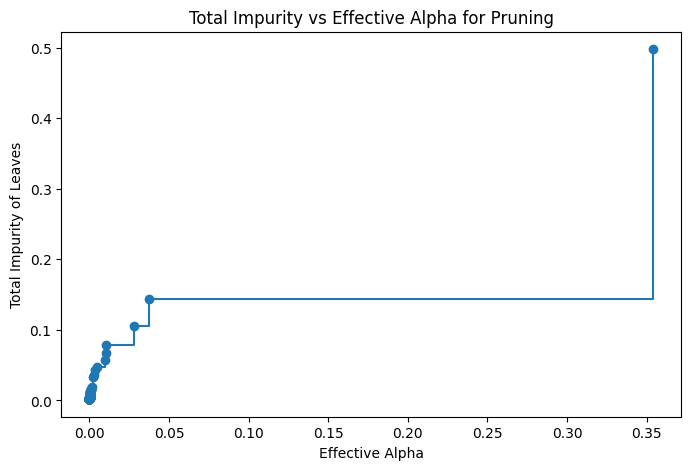

In [28]:
# Plot total impurity vs alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Pruning")
plt.show()

In [29]:
# Train trees with different alpha values and evaluate them
train_scores = []
test_scores = []

        duration protocol_type   service  src_bytes  dst_bytes flag  \
0              0           udp     other        146          0   SF   
1              0           tcp   private          0          0   S0   
2              0           tcp      http        232       8153   SF   
3              0           tcp      http        199        420   SF   
4              0           tcp   private          0          0  REJ   
...          ...           ...       ...        ...        ...  ...   
125967         0           tcp   private          0          0   S0   
125968         8           udp   private        105        145   SF   
125969         0           tcp      smtp       2231        384   SF   
125970         0           tcp    klogin          0          0   S0   
125971         0           tcp  ftp_data        151          0   SF   

        wrong_fragment  count  
0                    0     13  
1                    0    123  
2                    0      5  
3                  

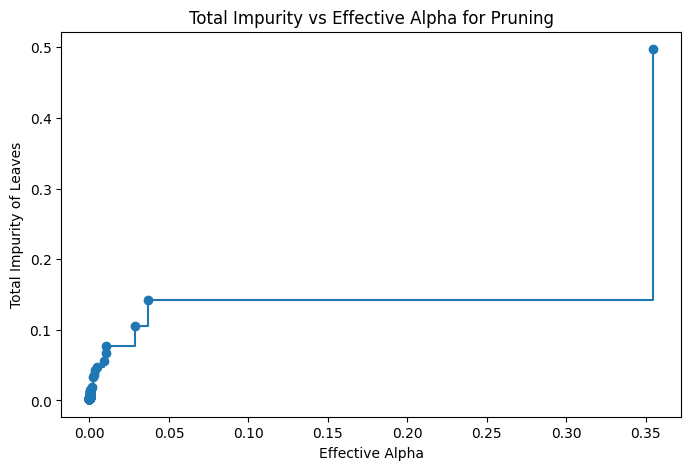

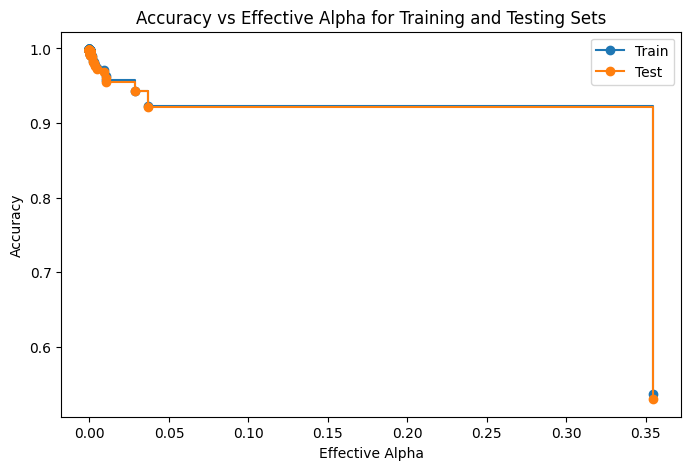

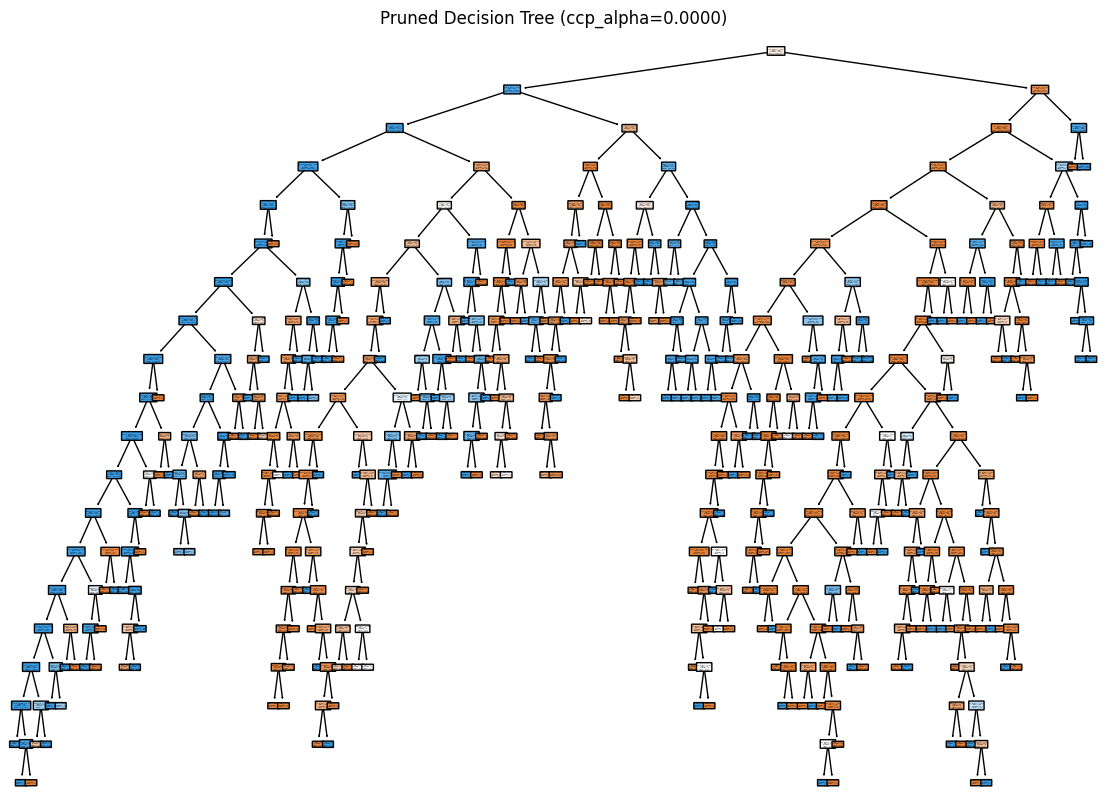

Best alpha: 0.0000
Train accuracy of best pruned tree: 1.00
Test accuracy of best pruned tree: 1.00


In [32]:
# Define categorical features explicitly
categorical_features = ["protocol_type", "service", "flag"]

# Select relevant features and the target label
features = ["duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "wrong_fragment", "count"]
X = df[features]

print(X)
# For y (our target variable), we convert the 'attack' column into binary values: 1 for any attack and 0 for normal traffic
y = df["attack"].apply(lambda x: 1 if x != "normal" else 0)  # Convert label to binary: 1 for attack, 0 for normal

# Encode categorical features in the full dataset before splitting
# We use pd.get_dummies() to perform one-hot encoding on the categorical columns ("protocol_type", "service", "flag").
# This step converts each category into its own binary column, which enables the model to interpret categorical data as numerical features.
X = pd.get_dummies(X, columns=categorical_features)

# Split the encoded dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
# We use StandardScaler() to standardize the feature values, ensuring that each feature has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an unpruned decision tree
tree_unpruned = DecisionTreeClassifier(random_state=42)
tree_unpruned.fit(X_train_scaled, y_train)

# Get cost complexity pruning path
path = tree_unpruned.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Plot total impurity vs alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Pruning")
plt.show()

# Train trees with different alpha values and evaluate them
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_scaled, y_train)
    train_scores.append(clf.score(X_train_scaled, y_train))
    test_scores.append(clf.score(X_test_scaled, y_test))

# Plot training and testing scores vs alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Effective Alpha for Training and Testing Sets")
plt.show()

# Select the best alpha value based on test accuracy
best_alpha = ccp_alphas[np.argmax(test_scores)]
best_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_tree.fit(X_train_scaled, y_train)

# Visualize the pruned tree
plt.figure(figsize=(14, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["Normal", "Attack"], rounded=True)
plt.title(f"Pruned Decision Tree (ccp_alpha={best_alpha:.4f})")
plt.show()

# Print accuracy of the best pruned tree
print(f"Best alpha: {best_alpha:.4f}")
print(f"Train accuracy of best pruned tree: {best_tree.score(X_train_scaled, y_train):.2f}")
print(f"Test accuracy of best pruned tree: {best_tree.score(X_test_scaled, y_test):.2f}")



In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in df)
features = ["duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "wrong_fragment", "count"]
X = df[features]
y = df["attack"].apply(lambda x: 1 if x != "normal" else 0)  # Binary classification: 1 for attack, 0 for normal

# One-hot encoding categorical features
categorical_features = ["protocol_type", "service", "flag"]
X = pd.get_dummies(X, columns=categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a Bagging ensemble with Decision Tree as the base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=50,
    random_state=42
)

# Train the Bagging model
bagging_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_bagging = bagging_model.predict(X_test_scaled)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {bagging_accuracy:.2f}")


Bagging Accuracy: 1.00


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 1.00


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Accuracy: 0.99


In [38]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models for Voting
voting_model = VotingClassifier(
    estimators=[
        ('bagging', bagging_model),
        ('random_forest', rf_model),
        ('gradient_boosting', gb_model)
    ],
    voting='hard'  # 'hard' for majority vote, 'soft' for weighted average of probabilities
)

# Train the Voting model
voting_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_voting = voting_model.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Ensemble Accuracy: {voting_accuracy:.2f}")


Voting Ensemble Accuracy: 1.00
